
<br>
<center>
<font size='7' style="color:#0D47A1">  <b>QOSF MENTORSHIP PROGRAM 2020</b> </font>
</center>

<hr style= "height:3px;">
<br>

This task is inspired by the Quantum Approximate Optimization Algorithm (QAOA) and as such, we will explore the performance of different simulations as the number of layers that define their circuits is increased. Addiotionally, in this Bonus Question Notebook, we explore the combination of different gates for the Odd and Even Blocks.

The following Notebook is organized as follows: 

    i) Import utilities and required packages
    ii) Initialize the parameters for the simulations.
    iii) Execute and analysis of the simulations.
    iv) Optimization of the variational parameters. 
    v) Set the simulation for the optimized parameters.
    vi) Execution and comparison of the simulations.
    vii) Perspectives. 


# Imports

In [1]:
# Import everything from the utils files
from utils import *

In [2]:
# Matplotlib imports
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

# Matplotlib parameters for nicer plots
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20


In [4]:

# Set the seed for the random number generator
np.random.seed(101)


<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Intialization of the simulation parameters

In [5]:

# Set the maximum number of layers 
MAXIMUM_NUM_LAYERS = 5


In [6]:

# Generate the vectors of angles for the odd and even blocks for all layers
odd_angles  = [2*pi*np.random.random_sample(4) for i in range(MAXIMUM_NUM_LAYERS)]
even_angles = [2*pi*np.random.random_sample(4) for i in range(MAXIMUM_NUM_LAYERS)]


In what follows I will refer to all of the objects containing the relevant information for the simulation task as "caseN", where N is the building case at hand. This is due to the nomenclature that I choose during the design of the class 'simulation'. You can read more about in the "utils.py" file, but it essentially means: 
    
    CASE1:
    ------
    AXIS X: ODD BLOCKS
    AXIS X: EVEN BLOCKS
    
    
    CASE2:
    ------
    AXIS X: ODD BLOCKS
    AXIS Y: EVEN BLOCKS
    
    CASE3:
    ------
    AXIS X: ODD BLOCKS
    AXIS Z: EVEN BLOCKS

In [7]:

# Define the registers and circuits

registers_case1 = {"q"+str(i): QuantumRegister(4) for i in range(0, MAXIMUM_NUM_LAYERS)}
circuits_case1 = {"qc"+str(i): QuantumCircuit(registers_case1["q"+str(i)]) for i in range(0, MAXIMUM_NUM_LAYERS)}

registers_case2 = {"q"+str(i): QuantumRegister(4) for i in range(0, MAXIMUM_NUM_LAYERS)}
circuits_case2 = {"qc"+str(i): QuantumCircuit(registers_case2["q"+str(i)]) for i in range(0, MAXIMUM_NUM_LAYERS)}

registers_case3 = {"q"+str(i): QuantumRegister(4) for i in range(0, MAXIMUM_NUM_LAYERS)}
circuits_case3 = {"qc"+str(i): QuantumCircuit(registers_case3["q"+str(i)]) for i in range(0, MAXIMUM_NUM_LAYERS)}


In [8]:

# Initialize the simulation for all layers and store them in a dictionary for easy acces and reference
simulations_case1 = {"sim"+str(i): simulation(registers_case3["q"+str(i)], circuits_case3["qc"+str(i)], i+1, odd_angles[:i+1], even_angles[:i+1], 1).build_case1() for i in range(0, MAXIMUM_NUM_LAYERS)}
simulations_case2 = {"sim"+str(i): simulation(registers_case3["q"+str(i)], circuits_case3["qc"+str(i)], i+1, odd_angles[:i+1], even_angles[:i+1], 2).build_case2() for i in range(0, MAXIMUM_NUM_LAYERS)}
simulations_case3 = {"sim"+str(i): simulation(registers_case3["q"+str(i)], circuits_case3["qc"+str(i)], i+1, odd_angles[:i+1], even_angles[:i+1], 3).build_case3() for i in range(0, MAXIMUM_NUM_LAYERS)}


In [9]:

# Get and store all of the optimized states in a dictionary for easy reference and access 
states_case1 = {"state"+str(i): execute(simulations_case1["sim"+str(i)], backend).result().get_statevector() for i in range(0, MAXIMUM_NUM_LAYERS)}
states_case2 = {"state"+str(i): execute(simulations_case2["sim"+str(i)], backend).result().get_statevector() for i in range(0, MAXIMUM_NUM_LAYERS)}
states_case3 = {"state"+str(i): execute(simulations_case3["sim"+str(i)], backend).result().get_statevector() for i in range(0, MAXIMUM_NUM_LAYERS)}


In [10]:

# Stores the optimized distances in an array for further analysis
y_case1 = [np.linalg.norm(states_case1["state"+str(i)] - phi) for i in range(0, MAXIMUM_NUM_LAYERS)]
y_case2 = [np.linalg.norm(states_case2["state"+str(i)] - phi) for i in range(0, MAXIMUM_NUM_LAYERS)]
y_case3 = [np.linalg.norm(states_case3["state"+str(i)] - phi) for i in range(0, MAXIMUM_NUM_LAYERS)]


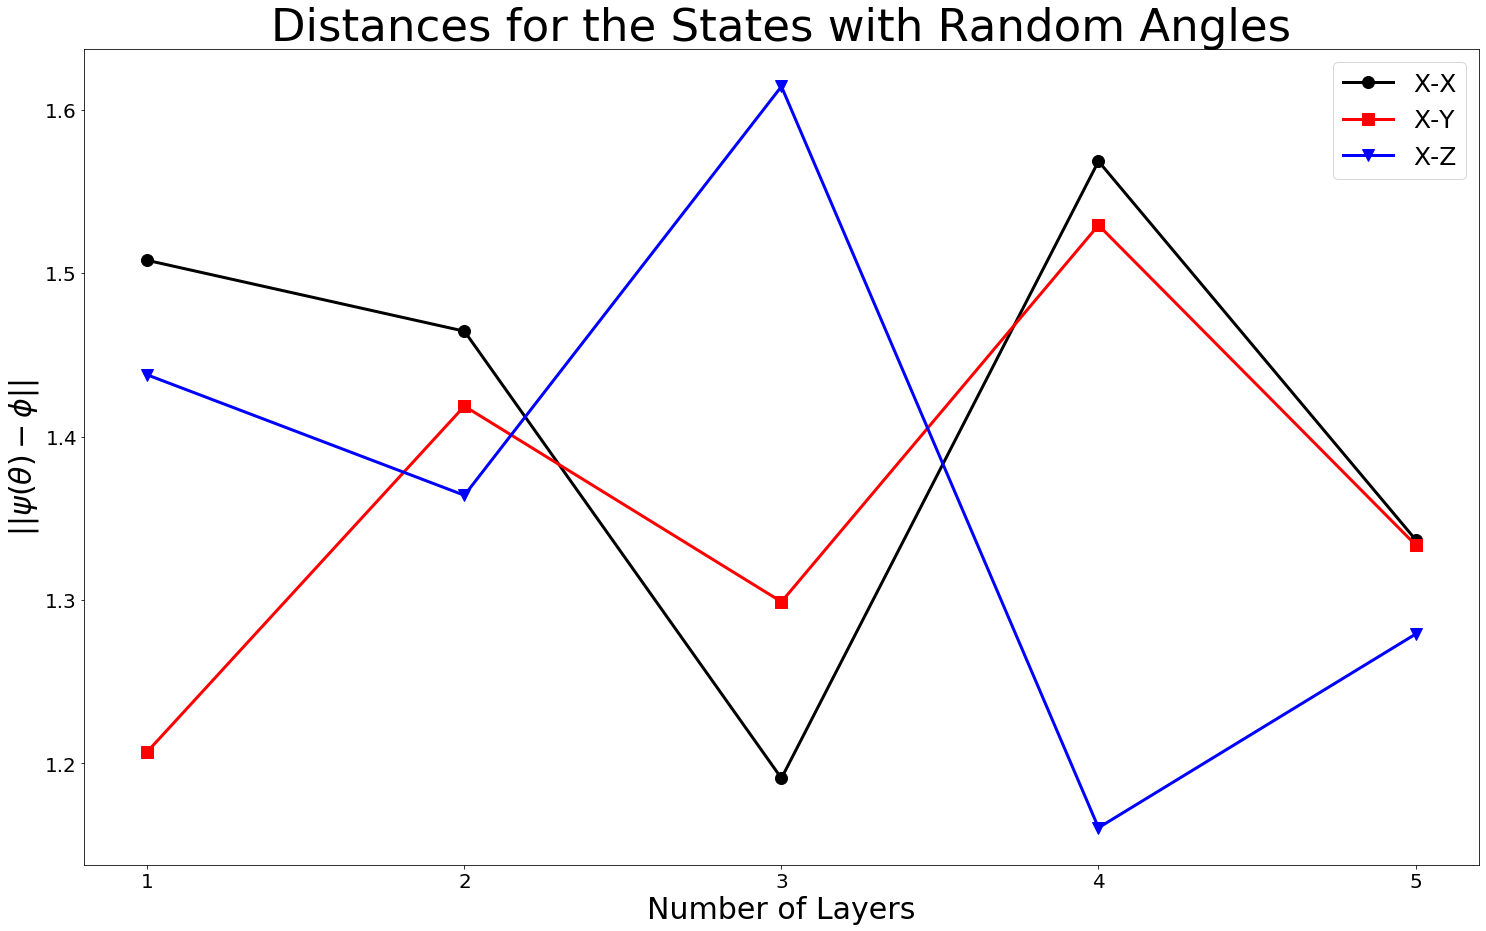

In [11]:

plt.figure(figsize=(25,15))

plt.plot([i for i in range(1, MAXIMUM_NUM_LAYERS+1)], y_case1, '-o', markersize=12, 
         linewidth=3, c='k', label='X-X')

plt.plot([i for i in range(1, MAXIMUM_NUM_LAYERS+1)], y_case2, '-s', markersize=12, 
         linewidth=3, c='r', label='X-Y')

plt.plot([i for i in range(1, MAXIMUM_NUM_LAYERS+1)], y_case3, '-v', markersize=12, 
         linewidth=3, c='b', label='X-Z')

plt.title('Distances for the States with Random Angles', fontsize=45)
plt.xlabel(r'Number of Layers', fontsize=30)
plt.ylabel(r'$\|\|\psi(\theta) - \phi\|\|$', fontsize=30)
plt.legend(loc='best', fontsize=25)

plt.xticks(np.arange(1, MAXIMUM_NUM_LAYERS+1, step=1))
plt.show()


Again, regardless of the combination of gates used, we do not obervse any trend. The final states are essentially random. 

# Optimization of the Variational Parameters

In [12]:

# Optimize case 1
optimized_angles_case1 = {"layer"+str(l): optimization_case1(l, odd_angles[:l+1],  even_angles[:l+1]) for l in trange(MAXIMUM_NUM_LAYERS)}


100%|██████████| 5/5 [09:34<00:00, 115.00s/it]


In [13]:

# Optimize case 2
optimized_angles_case2 = {"layer"+str(l): optimization_case2(l, odd_angles[:l+1],  even_angles[:l+1]) for l in trange(MAXIMUM_NUM_LAYERS)}


100%|██████████| 5/5 [24:49<00:00, 297.86s/it]


In [14]:

# Optimize case 3
optimized_angles_case3 = {"layer"+str(l): optimization_case3(l, odd_angles[:l+1],  even_angles[:l+1]) for l in trange(MAXIMUM_NUM_LAYERS)}


100%|██████████| 5/5 [22:27<00:00, 269.43s/it]


# Initialize the simulations with Optimized Parameters

In [15]:

# Define new registers for the optimized case
opt_registers_case1 = {"q"+str(i): QuantumRegister(4) for i in range(0, MAXIMUM_NUM_LAYERS)}
opt_registers_case2 = {"q"+str(i): QuantumRegister(4) for i in range(0, MAXIMUM_NUM_LAYERS)}
opt_registers_case3 = {"q"+str(i): QuantumRegister(4) for i in range(0, MAXIMUM_NUM_LAYERS)}


In [16]:

# Define new circuits for the optimized case
opt_circuits_case1 = {"qc"+str(i): QuantumCircuit(opt_registers_case1["q"+str(i)]) for i in range(0, MAXIMUM_NUM_LAYERS)}
opt_circuits_case2 = {"qc"+str(i): QuantumCircuit(opt_registers_case2["q"+str(i)]) for i in range(0, MAXIMUM_NUM_LAYERS)}
opt_circuits_case3 = {"qc"+str(i): QuantumCircuit(opt_registers_case3["q"+str(i)]) for i in range(0, MAXIMUM_NUM_LAYERS)}


In [17]:

# Set up the simulations with all of the optimized angles for the all layers
opt_simulations_case1 = {"sim"+str(i): simulation(opt_registers_case1["q"+str(i)], opt_circuits_case1["qc"+str(i)], i+1, optimized_angles_case1["layer"+str(i)][0], optimized_angles_case1["layer"+str(i)][1], 1).build_case1() for i in range(0, MAXIMUM_NUM_LAYERS)}
opt_simulations_case2 = {"sim"+str(i): simulation(opt_registers_case2["q"+str(i)], opt_circuits_case2["qc"+str(i)], i+1, optimized_angles_case2["layer"+str(i)][0], optimized_angles_case2["layer"+str(i)][1], 2).build_case2() for i in range(0, MAXIMUM_NUM_LAYERS)}
opt_simulations_case3 = {"sim"+str(i): simulation(opt_registers_case3["q"+str(i)], opt_circuits_case3["qc"+str(i)], i+1, optimized_angles_case3["layer"+str(i)][0], optimized_angles_case3["layer"+str(i)][1], 3).build_case3() for i in range(0, MAXIMUM_NUM_LAYERS)}


In [18]:

# Get and store all of the optimized states in a dictionary for easy reference and access
opt_states_case1 = {"state"+str(i): execute(opt_simulations_case1["sim"+str(i)], backend).result().get_statevector() for i in range(0, MAXIMUM_NUM_LAYERS)}
opt_states_case2 = {"state"+str(i): execute(opt_simulations_case2["sim"+str(i)], backend).result().get_statevector() for i in range(0, MAXIMUM_NUM_LAYERS)}
opt_states_case3 = {"state"+str(i): execute(opt_simulations_case3["sim"+str(i)], backend).result().get_statevector() for i in range(0, MAXIMUM_NUM_LAYERS)}


In [19]:

# Stores the optimized distances in an array for further analysis
opt_y_case1 = [np.linalg.norm(opt_states_case1["state"+str(i)] - phi) for i in range(0, MAXIMUM_NUM_LAYERS)]
opt_y_case2 = [np.linalg.norm(opt_states_case2["state"+str(i)] - phi) for i in range(0, MAXIMUM_NUM_LAYERS)]
opt_y_case3 = [np.linalg.norm(opt_states_case3["state"+str(i)] - phi) for i in range(0, MAXIMUM_NUM_LAYERS)]


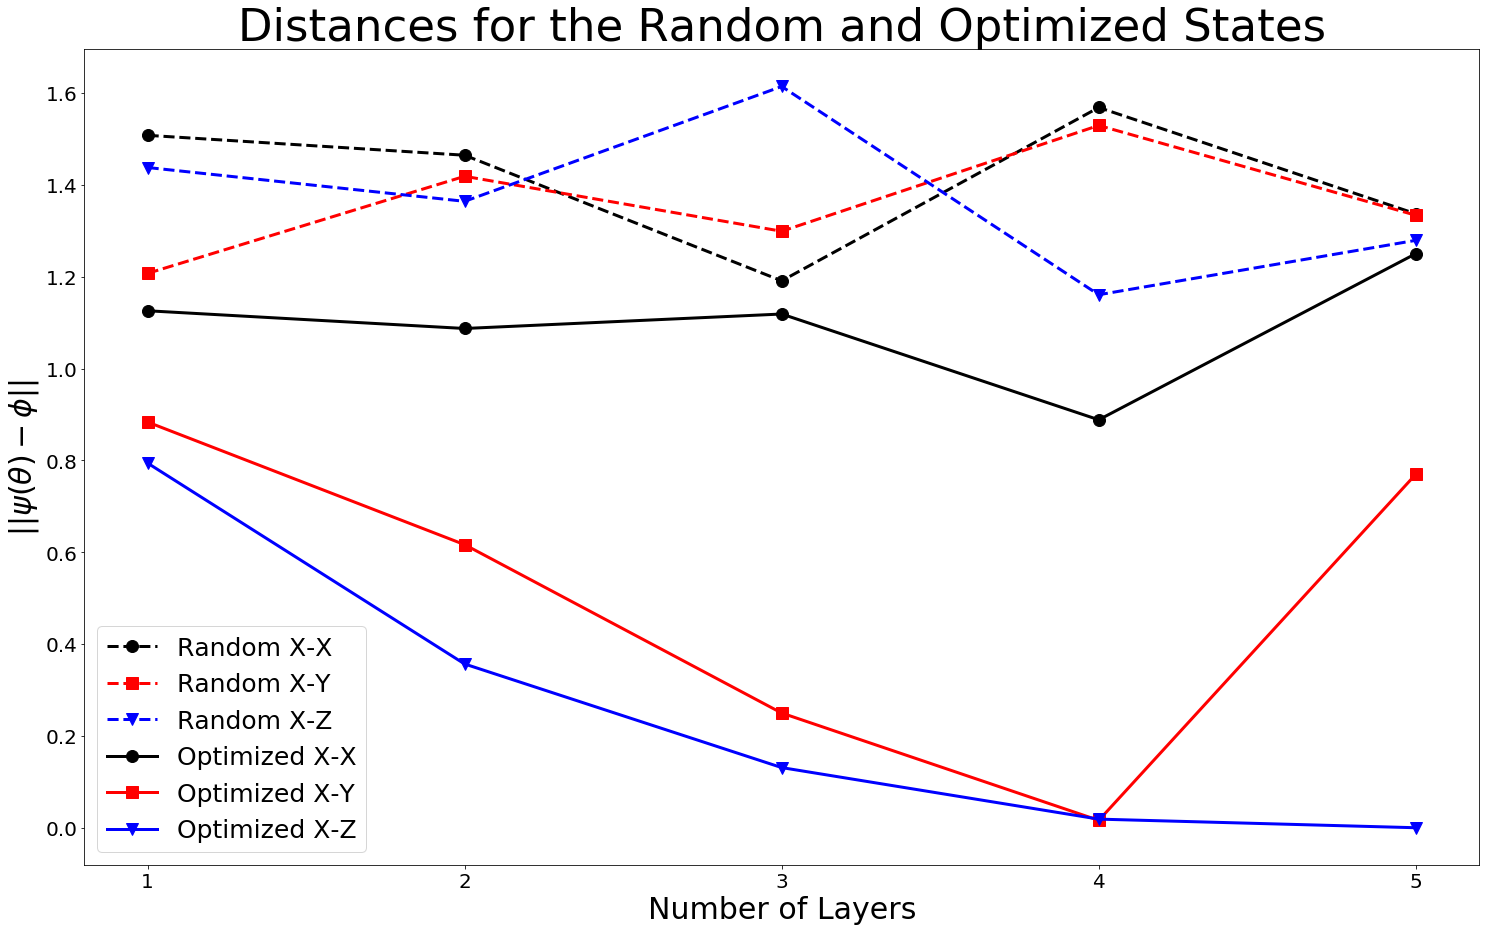

In [24]:

plt.figure(figsize=(25,15))


plt.plot([i for i in range(1, MAXIMUM_NUM_LAYERS+1)], y_case1, '--o', 
         linewidth=3, c='k', markersize=12, label='Random X-X')
plt.plot([i for i in range(1, MAXIMUM_NUM_LAYERS+1)], y_case2, '--s', 
         linewidth=3, c='r', markersize=12, label='Random X-Y')
plt.plot([i for i in range(1, MAXIMUM_NUM_LAYERS+1)], y_case3, '--v', 
         linewidth=3, c='b', markersize=12, label='Random X-Z')


plt.plot([i for i in range(1, MAXIMUM_NUM_LAYERS+1)], opt_y_case1, '-o', 
         linewidth=3, c='k', markersize=12, label='Optimized X-X')
plt.plot([i for i in range(1, MAXIMUM_NUM_LAYERS+1)], opt_y_case2, '-s', 
         linewidth=3, c='r', markersize=12, label='Optimized X-Y')
plt.plot([i for i in range(1, MAXIMUM_NUM_LAYERS+1)], opt_y_case3, '-v', 
         linewidth=3, c='b', markersize=12, label='Optimized X-Z')


plt.title('Distances for the Random and Optimized States', fontsize=45)
plt.xlabel(r'Number of Layers', fontsize=30)
plt.ylabel(r'$\|\|\psi(\theta) - \phi\|\|$', fontsize=30)
plt.legend(loc='best', fontsize=25)


plt.xticks(np.arange(1, MAXIMUM_NUM_LAYERS+1, step=1))
plt.show()


Form this plot it becomes obvious that having a rotation gate on-axis K for the ODD BLOCK follow by a control rotation on the same axis K on the EVEN BLOCK is the worst optimization strategy. Although not present in this Notebook, a similar trend would be expected for the cases Y-Y and Z-Z. For the X-Y and X-Z cases, we observe a rather small difference until the become the same at layer 4, just to later have an abrupt jump at the last layer. We do not have any reason to believe that the X-Y and X-Z cases would behave differently at higher layers, so this abrupt change may be caused by a numerical instability during the optimization process. Further work would clarify this issue. 

# Perspectives

    I) Increase the number of layers to see wether the cases X-Y and X-Z converge and to make sure that the abrupt change observed in this simulation is spurious. 
    
    II) Explore different architectures for the circuits. 
    
    II) Explore other gates and other combinations for the circuits.
    
    III) Combine different architectures and gates.
    
    IV) Just as before, could a machine learning algorithm find optimal architecture and composition (gates) for the simulations? What kind of algorithm would that be?
    
    V) Perhaps I can increase the performance of the simulations by using numba. 